In [5]:
# Define dataset paths
train_dataset_path = r"C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train"
test_dataset_path = r"C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\test"

# Check if the paths exist
import os

if os.path.exists(train_dataset_path):
    print(f"Train dataset successfully located at: {train_dataset_path}")
else:
    print("Train dataset not found! Please check the path.")

if os.path.exists(test_dataset_path):
    print(f"Test dataset successfully located at: {test_dataset_path}")
else:
    print("Test dataset not found! Please check the path.")


Train dataset successfully located at: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train
Test dataset successfully located at: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\test


In [6]:
import os
from collections import Counter

def summarize_dataset(directory):
    class_counts = Counter()
    for class_name in os.listdir(directory):
        class_folder = os.path.join(directory, class_name)
        if os.path.isdir(class_folder):
            num_images = len([
                file for file in os.listdir(class_folder) 
                if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))
            ])
            class_counts[class_name] += num_images
    return class_counts

train_summary = summarize_dataset(train_dataset_path)
test_summary = summarize_dataset(test_dataset_path)

print("Train Dataset Summary:", train_summary)
print("Test Dataset Summary:", test_summary)


Train Dataset Summary: Counter({'accident': 900, 'dense_traffic': 900, 'fire': 900, 'sparse_traffic': 900})
Test Dataset Summary: Counter({'accident': 200, 'dense_traffic': 200, 'fire': 200, 'sparse_traffic': 200})


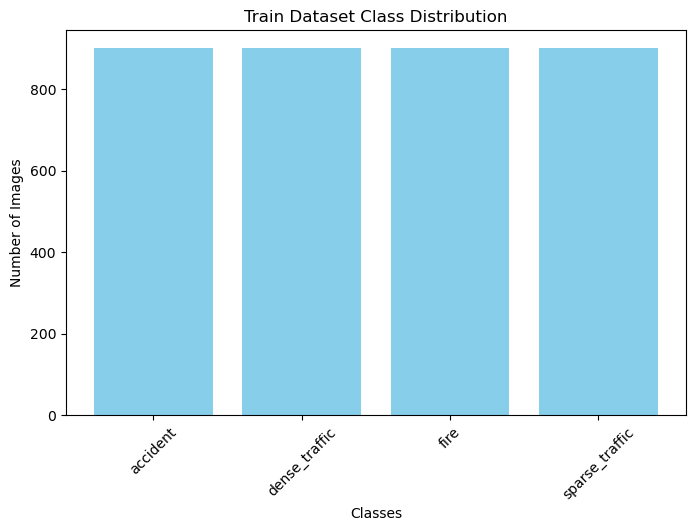

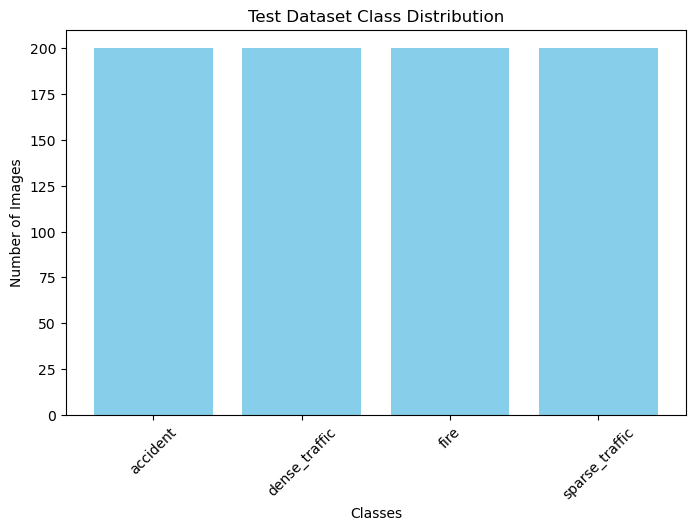

In [7]:
import matplotlib.pyplot as plt

def plot_class_distribution(summary, title):
    classes = list(summary.keys())
    counts = list(summary.values())
    
    plt.figure(figsize=(8, 5))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_summary, "Train Dataset Class Distribution")
plot_class_distribution(test_summary, "Test Dataset Class Distribution")


Class: accident


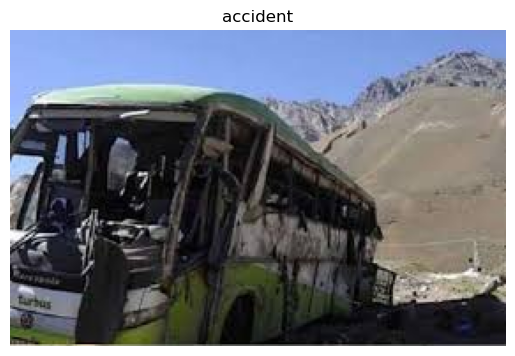

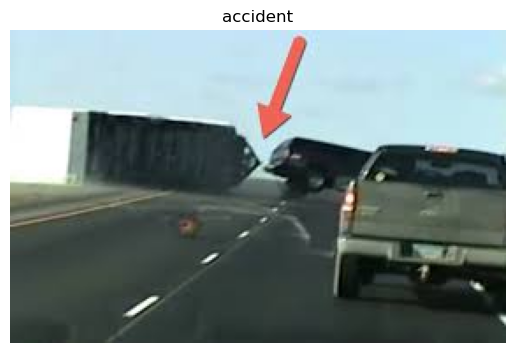

Class: dense_traffic


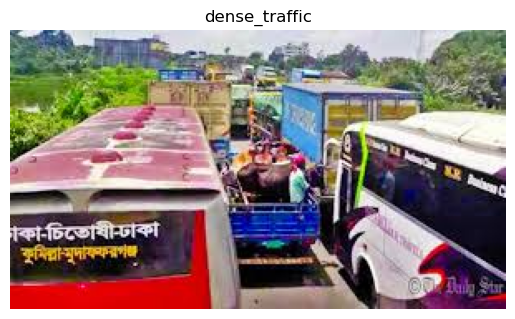

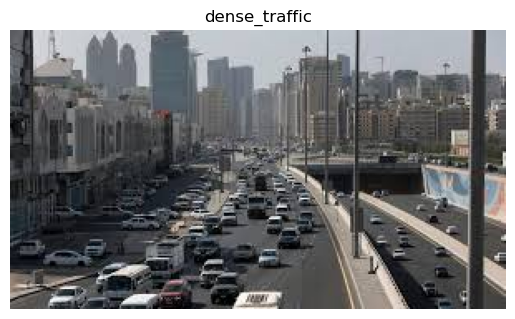

Class: fire


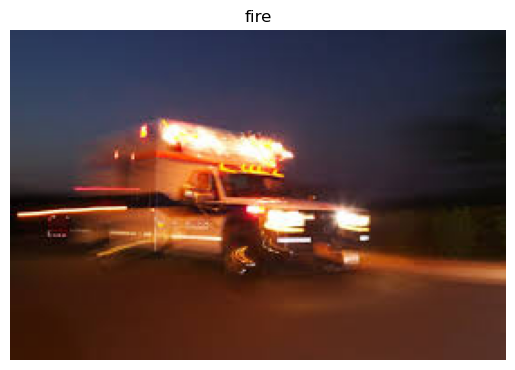

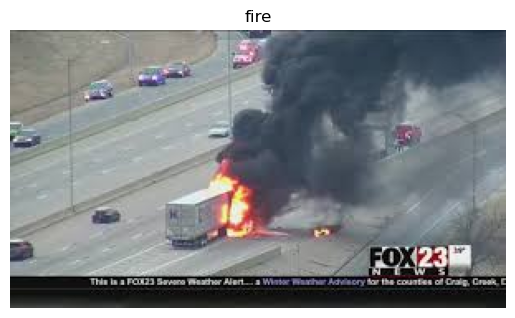

Class: sparse_traffic


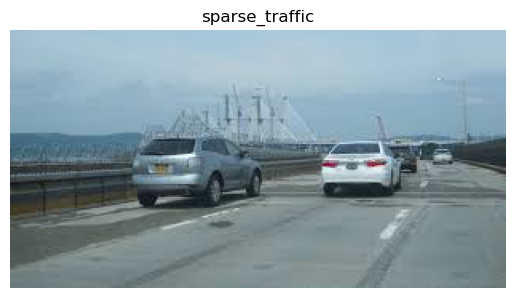

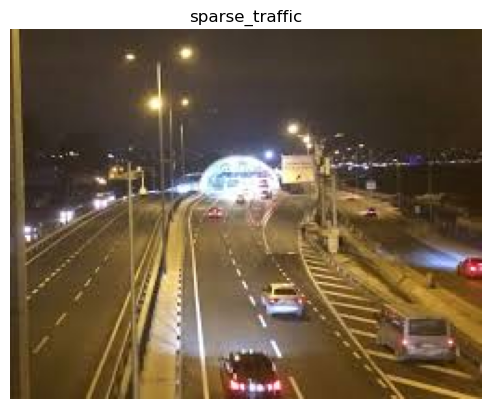

In [9]:
import random
import cv2
from matplotlib import pyplot as plt

def show_sample_images(directory, num_samples=2):
    for class_name in os.listdir(directory):
        class_folder = os.path.join(directory, class_name)
        if os.path.isdir(class_folder):
            sample_files = random.sample(
                [file for file in os.listdir(class_folder) if file.lower().endswith(('.jpg', '.jpeg', '.png'))], 
                min(num_samples, len(os.listdir(class_folder)))
            )
            print(f"Class: {class_name}")
            for file in sample_files:
                file_path = os.path.join(class_folder, file)
                img = cv2.imread(file_path)
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(img_rgb)
                plt.title(class_name)
                plt.axis('off')
                plt.show()

show_sample_images(train_dataset_path)


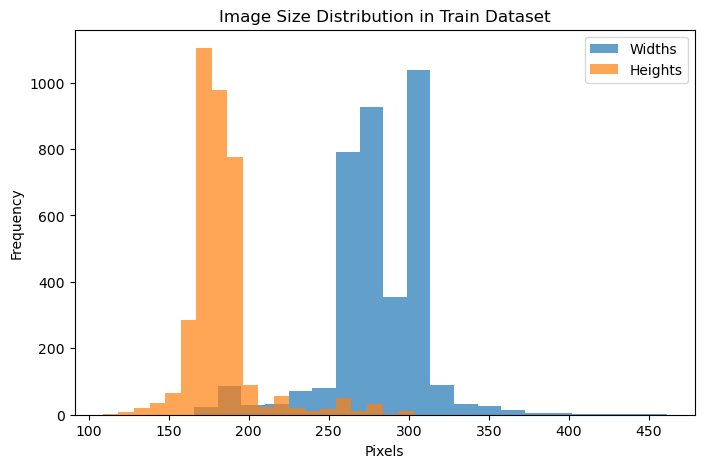

In [10]:
def analyze_image_sizes(directory):
    widths, heights = [], []
    for class_name in os.listdir(directory):
        class_folder = os.path.join(directory, class_name)
        if os.path.isdir(class_folder):
            for file in os.listdir(class_folder):
                if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff')):
                    file_path = os.path.join(class_folder, file)
                    img = cv2.imread(file_path)
                    if img is not None:
                        heights.append(img.shape[0])
                        widths.append(img.shape[1])
    return widths, heights

train_widths, train_heights = analyze_image_sizes(train_dataset_path)

plt.figure(figsize=(8, 5))
plt.hist(train_widths, bins=20, alpha=0.7, label='Widths')
plt.hist(train_heights, bins=20, alpha=0.7, label='Heights')
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Image Size Distribution in Train Dataset")
plt.legend()
plt.show()


In [11]:
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

IMG_SIZE = (224, 224)  # Resize all images to this size

def preprocess_images(directory):
    images, labels = [], []
    class_names = os.listdir(directory)
    for label, class_name in enumerate(class_names):
        class_folder = os.path.join(directory, class_name)
        if os.path.isdir(class_folder):
            for file in os.listdir(class_folder):
                if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    file_path = os.path.join(class_folder, file)
                    img = cv2.imread(file_path)
                    if img is not None:
                        img_resized = cv2.resize(img, IMG_SIZE)
                        images.append(img_resized / 255.0)  # Normalize pixel values
                        labels.append(label)
    return np.array(images), to_categorical(labels), class_names

# Preprocess train and test datasets
X_train, y_train, train_classes = preprocess_images(train_dataset_path)
X_test, y_test, test_classes = preprocess_images(test_dataset_path)

print(f"Train Dataset: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test Dataset: {X_test.shape}, Labels: {y_test.shape}")


Train Dataset: (3600, 224, 224, 3), Labels: (3600, 4)
Test Dataset: (800, 224, 224, 3), Labels: (800, 4)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_classes), activation='softmax')  # Output layer for classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\payal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,908 (91.20 MB)

 Trainable params: 23,907,908 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Save the model
model.save("traffic_sign_classifier.h5")


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.4254 - loss: 2.3469 - val_accuracy: 0.5875 - val_loss: 1.0139
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.6768 - loss: 0.8478 - val_accuracy: 0.6450 - val_loss: 0.9478
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.7980 - loss: 0.5637 - val_accuracy: 0.6675 - val_loss: 1.0606
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.8940 - loss: 0.3405 - val_accuracy: 0.6812 - val_loss: 0.9862
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9297 - loss: 0.2280 - val_accuracy: 0.6775 - val_loss: 1.1249
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9542 - loss: 0.1526 - val_accuracy: 0.6575 - val_loss: 1.2485
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.9669 - loss: 0.1088 - val_accuracy: 0.6988 - val_loss: 1.2084
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.9843 - loss: 0.0614 - val_accu

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.6669 - loss: 1.5002
Test Accuracy: 0.68


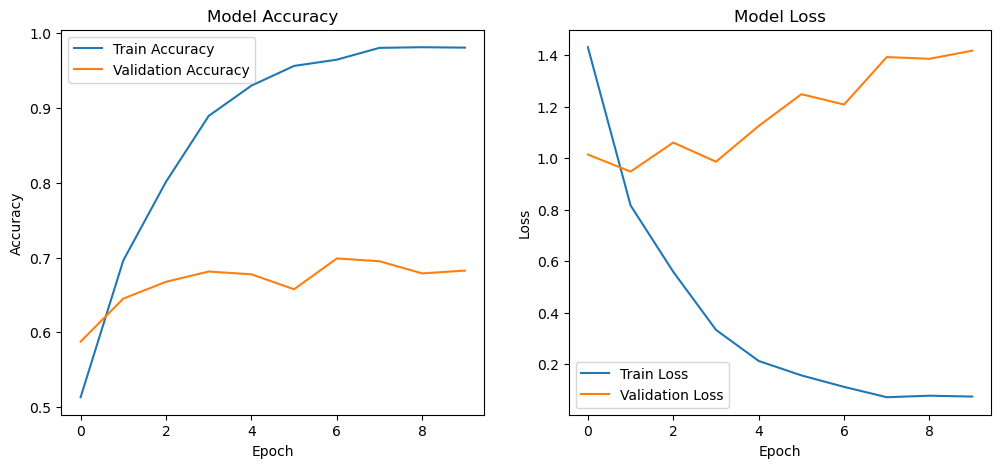

In [17]:
import matplotlib.pyplot as plt

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step
                precision    recall  f1-score   support

      accident       0.62      0.64      0.63       200
 dense_traffic       0.66      0.71      0.69       200
          fire       0.77      0.79      0.78       200
sparse_traffic       0.68      0.59      0.64       200

      accuracy                           0.68       800
     macro avg       0.68      0.68      0.68       800
  weighted avg       0.68      0.68      0.68       800



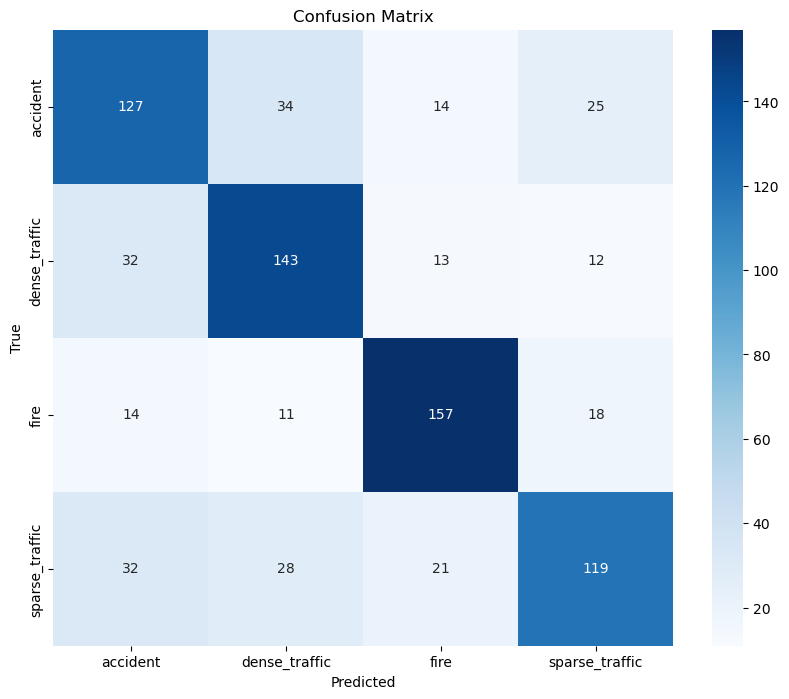

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict test labels
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_true, y_pred, target_names=test_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_classes, yticklabels=test_classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\sparse_traffic\images_214.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\sparse_traffic\images_215 (2).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\sparse_traffic\images_215.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\sparse_traffic\images_216 (2).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\sparse_traffic\images_216.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\sparse_traffic\images_217.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\sparse_traffic\images_218 (2).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\sparse_traffic\images_218.jpg
Checking file: C:\Users\paya

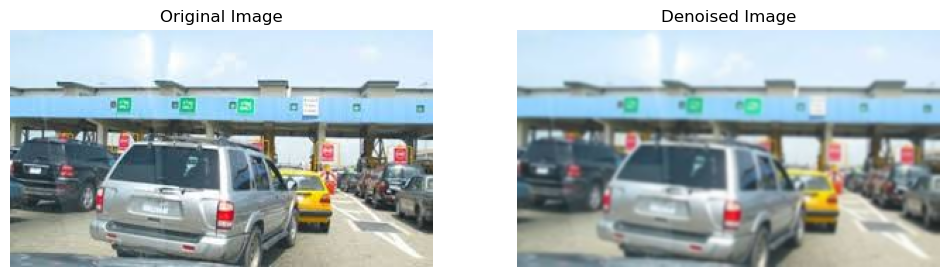

In [27]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to load images from a dataset folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        print(f"Checking file: {file_path}")  # Debugging step
        if os.path.isfile(file_path):  # Check if it's a file
            img = cv2.imread(file_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Failed to load image: {file_path}")
    return images

# Path to your dataset folder
dataset_path = r"C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\sparse_traffic"  # Using raw string literal

# Load images
images = load_images_from_folder(dataset_path)

# Check if dataset is loaded
if not images:
    print("No images found in the provided dataset path.")
else:
    print(f"Loaded {len(images)} images.")

# Process the first image if available
if images:
    # Example: Denoise and display the first image
    original_image = images[0]  # Taking the first image from the dataset
    denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

    # Convert images to RGB for visualization
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    denoised_image_rgb = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)

    # Display original and denoised images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(denoised_image_rgb)
    plt.title("Denoised Image")
    plt.axis('off')

    plt.show()


Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\fire\images_142 (2).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\fire\images_142 (3).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\fire\images_142.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\fire\images_143 (2).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\fire\images_143.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\fire\images_145.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\fire\images_146 (2).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\fire\images_146.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\fire\images_14

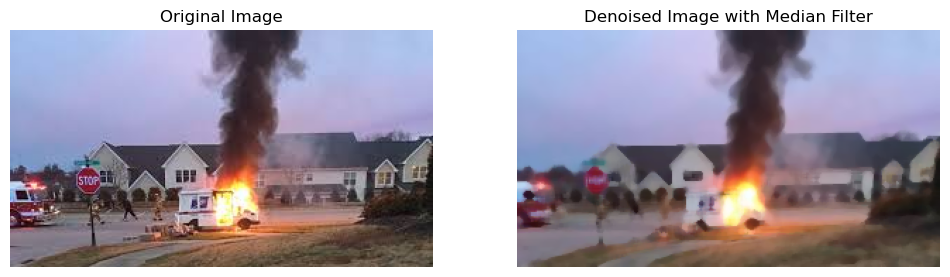

In [29]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to load images from a dataset folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        print(f"Checking file: {file_path}")  # Debugging step
        if os.path.isfile(file_path):  # Check if it's a file
            img = cv2.imread(file_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Failed to load image: {file_path}")
    return images

# Path to your dataset folder
dataset_path = "C:\\Users\\payal\\Downloads\\trafficnet_dataset_v1\\trafficnet_dataset_v1\\train\\fire"

# Load images
images = load_images_from_folder(dataset_path)

# Check if dataset is loaded
if not images:
    print("No images found in the provided dataset path.")
else:
    print(f"Loaded {len(images)} images.")

# Process the first image if available
if images:
    # Example: Apply Median Filtering and display the first image
    original_image = images[0]  # Taking the first image from the dataset

    # Apply Median Filtering
    denoised_image = cv2.medianBlur(original_image, 5)  # 5 is the kernel size (odd number)

    # Convert images to RGB for visualization
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    denoised_image_rgb = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)

    # Display original and denoised images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(denoised_image_rgb)
    plt.title("Denoised Image with Median Filter")
    plt.axis('off')

    plt.show()


Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\accident\images_211.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\accident\images_212 (2).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\accident\images_212 (3).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\accident\images_212.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\accident\images_213 (2).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\accident\images_213.jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\accident\images_214 (2).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\trafficnet_dataset_v1\train\accident\images_214 (3).jpg
Checking file: C:\Users\payal\Downloads\trafficnet_dataset_v1\traffi

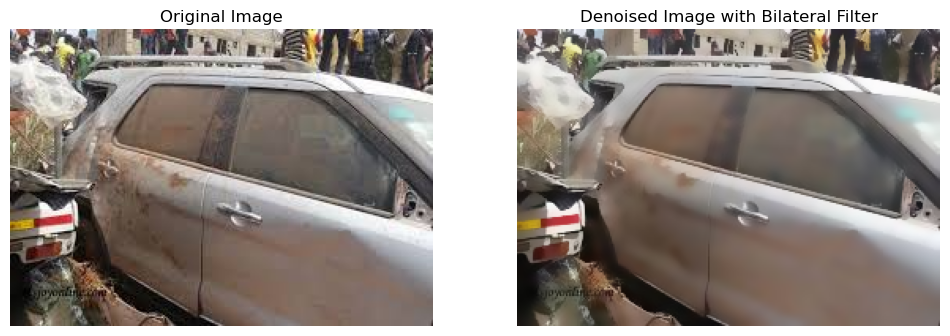

In [30]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to load images from a dataset folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        print(f"Checking file: {file_path}")  # Debugging step
        if os.path.isfile(file_path):  # Check if it's a file
            img = cv2.imread(file_path)
            if img is not None:
                images.append(img)
            else:
                print(f"Failed to load image: {file_path}")
    return images

# Path to your dataset folder
dataset_path = "C:\\Users\\payal\\Downloads\\trafficnet_dataset_v1\\trafficnet_dataset_v1\\train\\accident"

# Load images
images = load_images_from_folder(dataset_path)

# Check if dataset is loaded
if not images:
    print("No images found in the provided dataset path.")
else:
    print(f"Loaded {len(images)} images.")

# Process the first image if available
if images:
    # Example: Apply Bilateral Filtering and display the first image
    original_image = images[0]  # Taking the first image from the dataset

    # Apply Bilateral Filtering
    denoised_image = cv2.bilateralFilter(original_image, d=9, sigmaColor=75, sigmaSpace=75)

    # Convert images to RGB for visualization
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    denoised_image_rgb = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB)

    # Display original and denoised images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image_rgb)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(denoised_image_rgb)
    plt.title("Denoised Image with Bilateral Filter")
    plt.axis('off')

    plt.show()


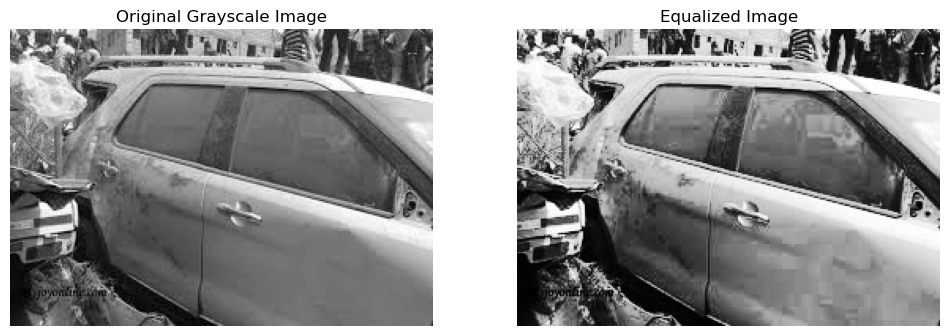

In [31]:
# Convert image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')
plt.show()


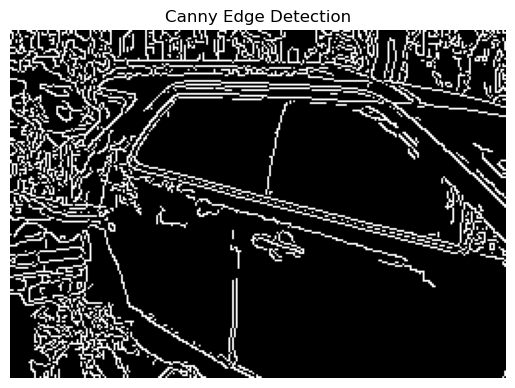

In [32]:
# Apply Canny edge detection
edges = cv2.Canny(original_image, threshold1=100, threshold2=200)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()


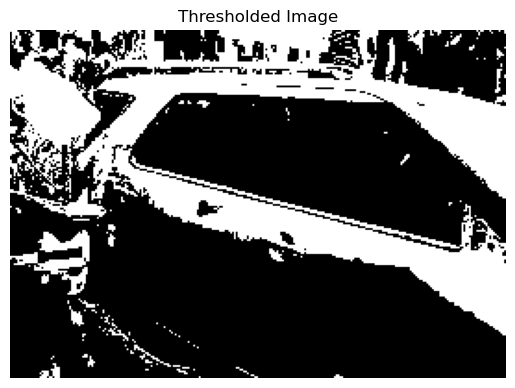

In [35]:
# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply simple thresholding
_, thresh_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresh_image, cmap='gray')
plt.title("Thresholded Image")
plt.axis('off')
plt.show()


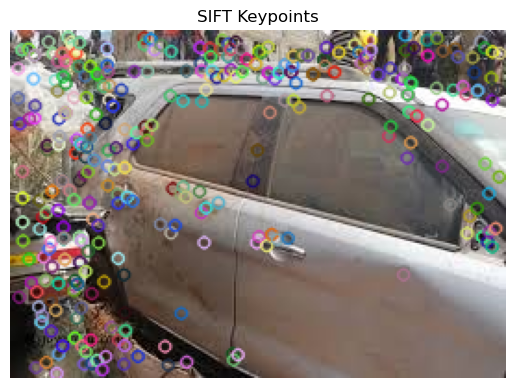

In [37]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(original_image, None)

# Draw the keypoints on the image
img_with_keypoints = cv2.drawKeypoints(original_image, keypoints, None)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title("SIFT Keypoints")
plt.axis('off')
plt.show()


In [1]:
from flask import Flask, request, render_template, jsonify
import os

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # Use an HTML template for the frontend

@app.route('/process', methods=['POST'])
def process():
    if 'file' not in request.files:
        return jsonify({"error": "No file uploaded"}), 400

    file = request.files['file']
    if file.filename == '':
        return jsonify({"error": "No selected file"}), 400

    # Save the uploaded file
    file.save(os.path.join('uploads', file.filename))
    # Perform your analysis/processing here
    result = "File processed successfully"

    return jsonify({"message": result})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\payal\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


In [3]:
python app.py


SyntaxError: invalid syntax (2255720966.py, line 1)